<a href="https://colab.research.google.com/github/jibintom/Machine-Learning-Codebasics-/blob/main/a13.%20K%20Means%20Clustering%20Algorithm/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing required library
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the data set

df=pd.read_csv("income_13.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

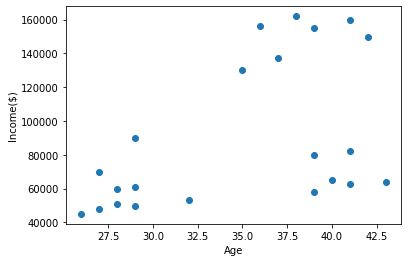

In [5]:
#visualize data to get an idea about clusters

plt.scatter(df.Age, df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [6]:
#Train the Model 

km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[["Age","Income($)"]])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
km.cluster_centers_ #its the centroid of our clusters given in x,y parameters

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [8]:
df["cluster"]=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


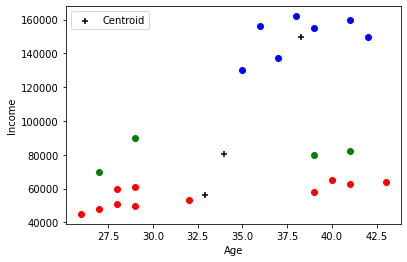

In [9]:
#plot the data against differnt clusters

df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.Age, df0["Income($)"], color="red")
plt.scatter(df1.Age, df1["Income($)"], color="blue")
plt.scatter(df2.Age, df2["Income($)"], color="green")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="+", color="black", label="Centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

Here looking into our plot its clear that red & green not grouped properly this is because our scaling is not right, because our y-axis large and x-axis is pretty narrow so in order to avoid this we have preprocess our data before training and in this example we use MinMaxScaler to process our data  

**Preprocessing using min max scaler**

In [10]:

scaler=MinMaxScaler() #MinMaxScaler() will arrange our data between 0 and 1
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])

scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Now our Data is scaled properly now we can train and plot our data

Text(0, 0.5, 'Income($)')

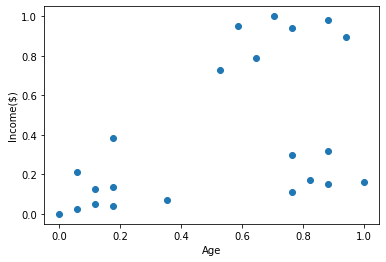

In [11]:
plt.scatter(df.Age, df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [12]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[["Age","Income($)"]])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [13]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [14]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

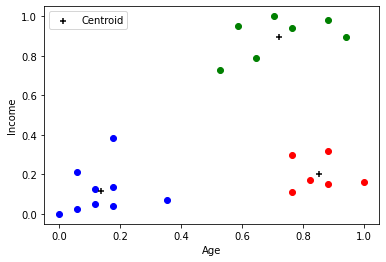

In [15]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.Age, df0["Income($)"], color="red")
plt.scatter(df1.Age, df1["Income($)"], color="blue")
plt.scatter(df2.Age, df2["Income($)"], color="green")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="+", color="black", label="Centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

## Elbow Method

In [16]:
k_rng=range(1,10)
sse=[] #sse is sum of square error

for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[["Age","Income($)"]])    #when we do KMeans.fit() function and access KMeans.inertia_ we have sum of square error
  sse.append(km.inertia_)
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.27558255687229766,
 0.22462070560435105,
 0.17473586079225925,
 0.13762504146528043,
 0.11123550695239098]

Text(0, 0.5, 'sum of square error')

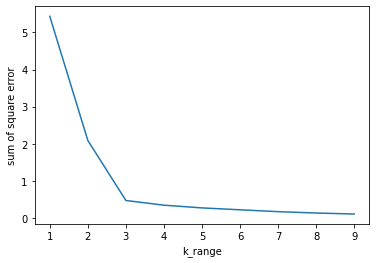

In [17]:
plt.plot(k_rng, sse)
plt.xlabel("k_range")
plt.ylabel("sum of square error")

### Exercise


Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
1. Figure out if any preprocessing such as scaling would help here
2. Draw elbow plot and from that figure out optimal value of k

In [18]:
from io import IncrementalNewlineDecoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris=load_iris()

In [19]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667


In [48]:
#processing the data for training
scaler=MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"]=scaler.transform(df[["petal length (cm)"]])

scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"]=scaler.transform(df[["petal width (cm)"]])

df=df.drop("sepal length (cm)", axis=1)
df=df.drop("sepal width (cm)", axis=1)
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


Text(0, 0.5, 'petal width (cm)')

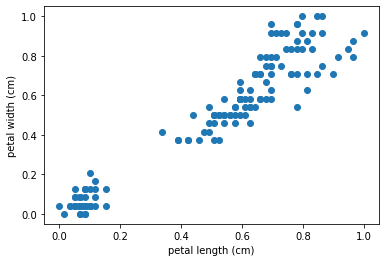

In [49]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [50]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [51]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

In [52]:
df["cluster"]=y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


Text(0, 0.5, 'petal width (cm)')

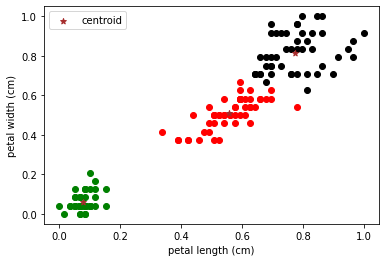

In [59]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"], color="black")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"], color="green")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"], color="red")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*", color="brown", label="centroid")
plt.legend()
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

### Elbow Method

In [60]:
k_rng=range(1,10)
sse=[]

for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[["petal length (cm)", "petal width (cm)"]])
  sse.append(km.inertia_)
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1615234094205573,
 0.8535683225340073,
 0.6806539059219305,
 0.5651273455703979,
 0.4861789349342511,
 0.41602409225888737]

Text(0, 0.5, 'Sum of square error')

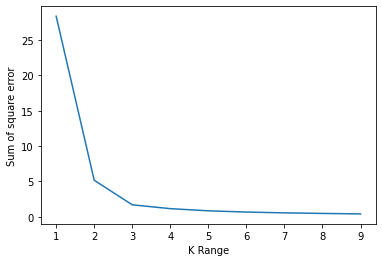

In [61]:
plt.plot(k_rng, sse)
plt.xlabel("K Range")
plt.ylabel("Sum of square error")